In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

In [234]:
df=pd.read_csv('crime.csv')
pd.set_option('display.max_columns',None)
df.head()

,State,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.0

In [235]:
df.shape

(1994, 128)

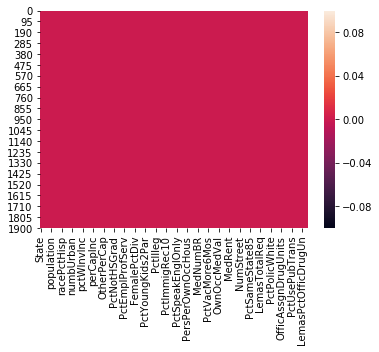

In [236]:
#we can see there are no missing values in the dataset which is false
# '?' is not considered as a missing value by the system.
sns.heatmap(df.isnull())

# Feature Engineering

In [237]:
#replacing ? in dataset to NAN
for col in df.columns:
    df[col]=df[col].replace('?',np.nan)

In [238]:
df.head()

,State,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.

In [239]:
for col in df.columns:
    print(col,df[col].isnull().sum())

#we can see in columns 50% of data and even more is missing.we can drop such columns

State 0
county 1174
community 1177
communityname 0
fold 0
population 0
householdsize 0
racepctblack 0
racePctWhite 0
racePctAsian 0
racePctHisp 0
agePct12t21 0
agePct12t29 0
agePct16t24 0
agePct65up 0
numbUrban 0
pctUrban 0
medIncome 0
pctWWage 0
pctWFarmSelf 0
pctWInvInc 0
pctWSocSec 0
pctWPubAsst 0
pctWRetire 0
medFamInc 0
perCapInc 0
whitePerCap 0
blackPerCap 0
indianPerCap 0
AsianPerCap 0
OtherPerCap 1
HispPerCap 0
NumUnderPov 0
PctPopUnderPov 0
PctLess9thGrade 0
PctNotHSGrad 0
PctBSorMore 0
PctUnemployed 0
PctEmploy 0
PctEmplManu 0
PctEmplProfServ 0
PctOccupManu 0
PctOccupMgmtProf 0
MalePctDivorce 0
MalePctNevMarr 0
FemalePctDiv 0
TotalPctDiv 0
PersPerFam 0
PctFam2Par 0
PctKids2Par 0
PctYoungKids2Par 0
PctTeen2Par 0
PctWorkMomYoungKids 0
PctWorkMom 0
NumIlleg 0
PctIlleg 0
NumImmig 0
PctImmigRecent 0
PctImmigRec5 0
PctImmigRec8 0
PctImmigRec10 0
PctRecentImmig 0
PctRecImmig5 0
PctRecImmig8 0
PctRecImmig10 0
PctSpeakEnglOnly 0
PctNotSpeakEnglWell 0
PctLargHouseFam 0
PctLargHouseOccu

In [240]:
#dropping columns having more than 50% missing values(1994/2==1000)
df=df.dropna(thresh=1000,axis=1)
df.shape

(1994, 104)

In [241]:
#According to dataset description except the column communityname all other variables are numerical type.
#but we can see this is false(OtherPerCap is object data types)
for col in df.columns:
    print(col,df[col].dtypes)


State int64
communityname object
fold int64
population float64
householdsize float64
racepctblack float64
racePctWhite float64
racePctAsian float64
racePctHisp float64
agePct12t21 float64
agePct12t29 float64
agePct16t24 float64
agePct65up float64
numbUrban float64
pctUrban float64
medIncome float64
pctWWage float64
pctWFarmSelf float64
pctWInvInc float64
pctWSocSec float64
pctWPubAsst float64
pctWRetire float64
medFamInc float64
perCapInc float64
whitePerCap float64
blackPerCap float64
indianPerCap float64
AsianPerCap float64
OtherPerCap object
HispPerCap float64
NumUnderPov float64
PctPopUnderPov float64
PctLess9thGrade float64
PctNotHSGrad float64
PctBSorMore float64
PctUnemployed float64
PctEmploy float64
PctEmplManu float64
PctEmplProfServ float64
PctOccupManu float64
PctOccupMgmtProf float64
MalePctDivorce float64
MalePctNevMarr float64
FemalePctDiv float64
TotalPctDiv float64
PersPerFam float64
PctFam2Par float64
PctKids2Par float64
PctYoungKids2Par float64
PctTeen2Par float64
Pc

In [242]:
#changing the data type to numerical 
for col in df.columns:
    if col=='communityname':
        pass
    else:
        
        df[col]=df[col].apply(pd.to_numeric)

In [243]:
for col in df.columns:
    print(col,df[col].dtypes)


State int64
communityname object
fold int64
population float64
householdsize float64
racepctblack float64
racePctWhite float64
racePctAsian float64
racePctHisp float64
agePct12t21 float64
agePct12t29 float64
agePct16t24 float64
agePct65up float64
numbUrban float64
pctUrban float64
medIncome float64
pctWWage float64
pctWFarmSelf float64
pctWInvInc float64
pctWSocSec float64
pctWPubAsst float64
pctWRetire float64
medFamInc float64
perCapInc float64
whitePerCap float64
blackPerCap float64
indianPerCap float64
AsianPerCap float64
OtherPerCap float64
HispPerCap float64
NumUnderPov float64
PctPopUnderPov float64
PctLess9thGrade float64
PctNotHSGrad float64
PctBSorMore float64
PctUnemployed float64
PctEmploy float64
PctEmplManu float64
PctEmplProfServ float64
PctOccupManu float64
PctOccupMgmtProf float64
MalePctDivorce float64
MalePctNevMarr float64
FemalePctDiv float64
TotalPctDiv float64
PersPerFam float64
PctFam2Par float64
PctKids2Par float64
PctYoungKids2Par float64
PctTeen2Par float64
P

In [244]:
df.describe()

,State,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1993.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.284742,0.386279,0.055507,0.303024,0.315807,0.383330,0.361675,0.363531,0.501073,0.396384,0.440597,0.391224,0.441339,0.461244,0.434453,0.487568,0.494273,0.487748,0.610918,0.620657,0.664032,0.582884,0.501449,0.526690,0.036294,0.249995,0.030060,0.320211,0.360622,0.399077,0.427879,0.181364,0.182126,0.184774,0.182879,0.785903,0.150587,0.267608,0.251891,0.462101,0.494428,0.404097,0.562598,0.186264,0.495186,0.314694,0.076815,0.719549,0.548686,0.204529,0.433335,0.494178,0.264478,0.243059,0.264689,0.263490,0.268942,0.346379,0.372457,0.422964,0.384102,0.490125,0.449754,0.403816,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,0.128256,0.444811,0.209362,0.182913,0.204108,0.178071,0.173619,0.222137,0.167564,0.198257,0.191109,0.186804,0.171593,0.164775,0.195411,0.191008,0.183081,0.127941,0.228474,0.213360,0.202508,0.209193,0.202171,0.174036,0.202386,0.175457,0.198922,0.186292,0.182460,0.175437,0.175170,0.183607,0.154594,0.201976,0.206353,0.218749,0.191507,0.168612,0.175

# imputing missing values

In [245]:
df['OtherPerCap']=df['OtherPerCap'].fillna(df['OtherPerCap'].mean())

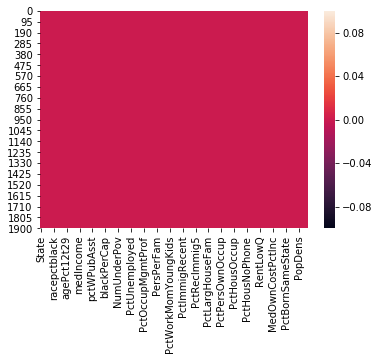

In [246]:
sns.heatmap(df.isnull())

# Dropping unnecessary column(communityname) 

In [247]:
df=df.drop(['communityname','State','fold'],axis=1)
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


# Separating training and testing set

In [199]:
y=df[['ViolentCrimesPerPop']]
x=df.drop('ViolentCrimesPerPop',axis=1)

# Feature Selection

In [200]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
xpca_50=pca.fit_transform(x)
xpca_50.shape

(1994, 50)

# EDA

# Univariate Analysis

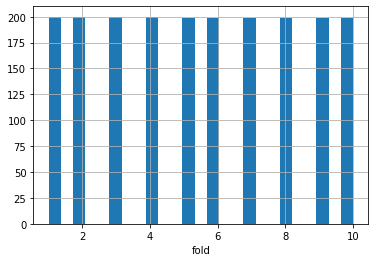

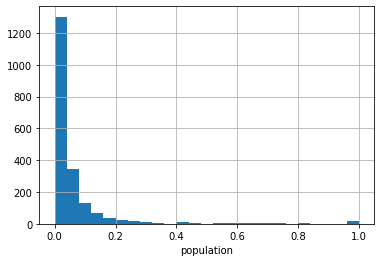

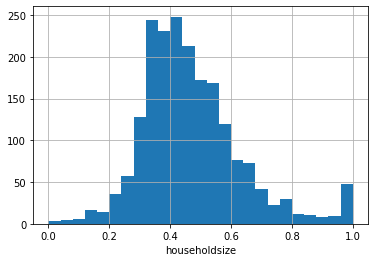

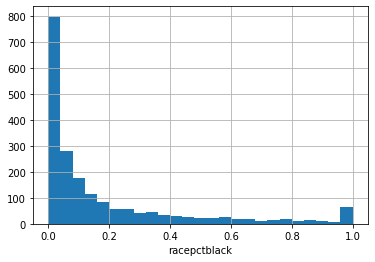

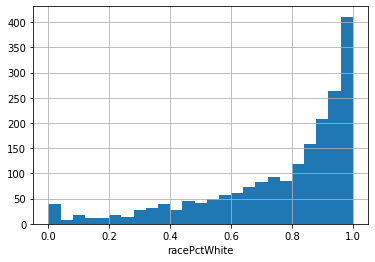

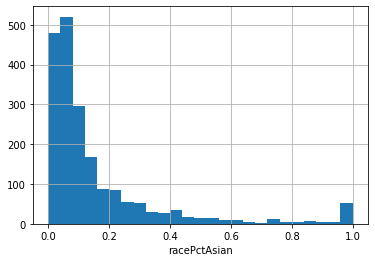

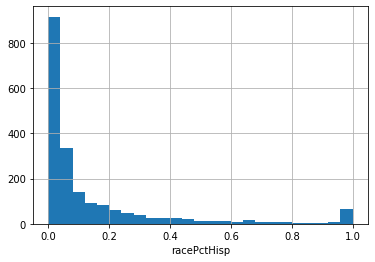

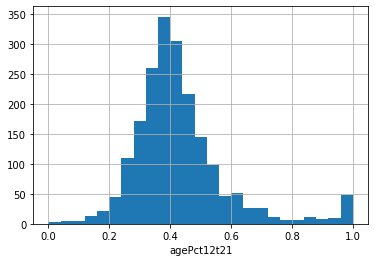

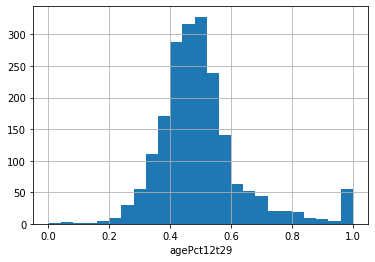

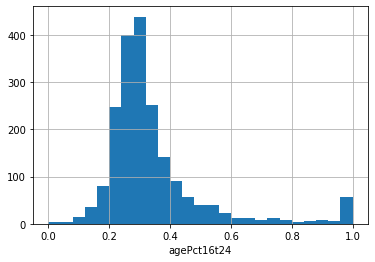

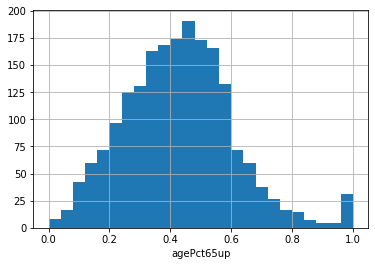

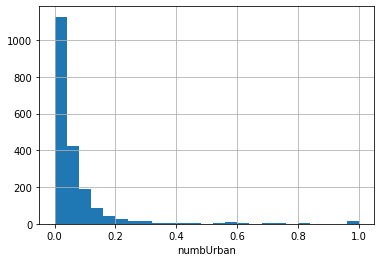

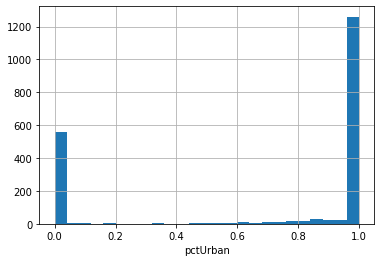

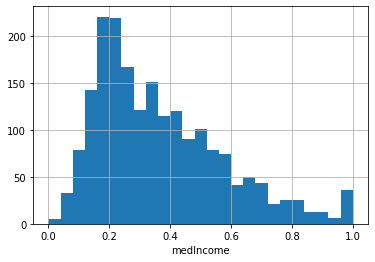

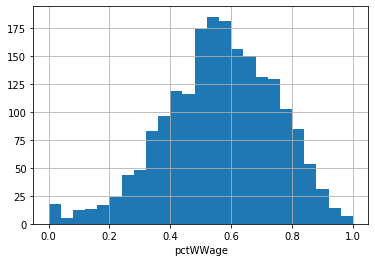

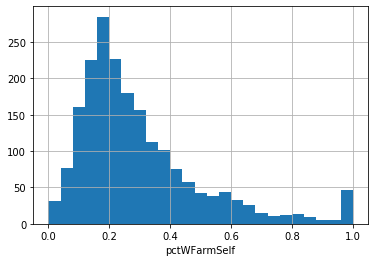

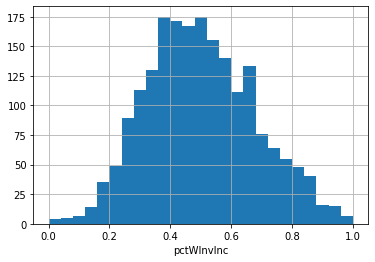

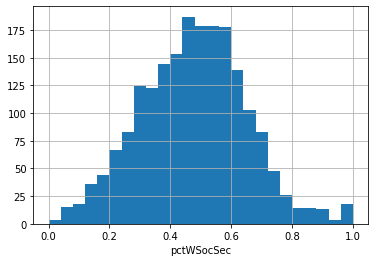

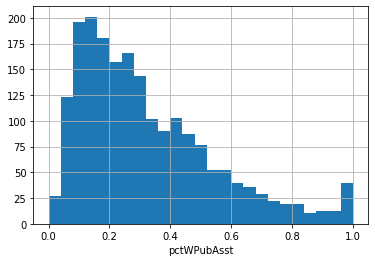

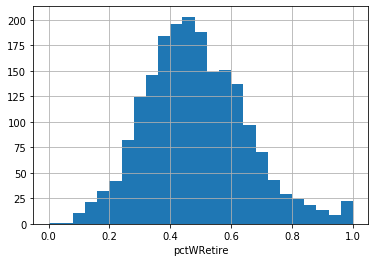

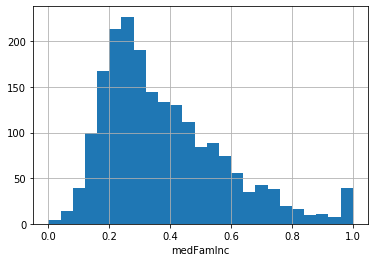

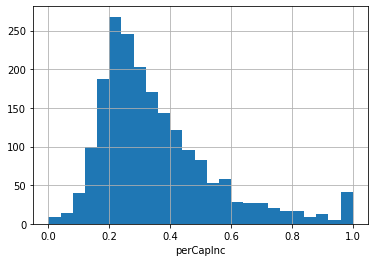

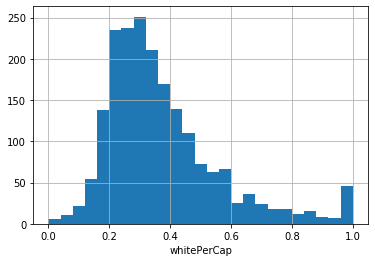

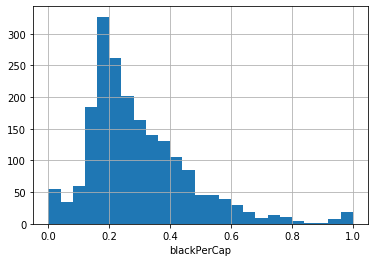

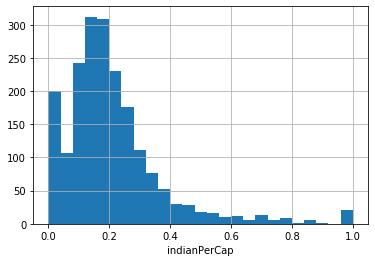

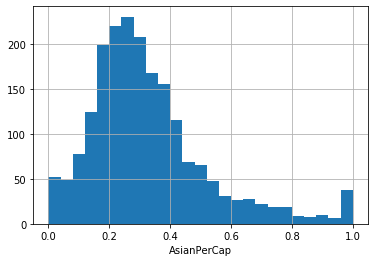

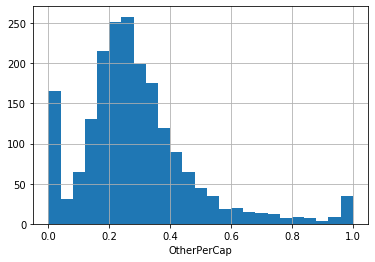

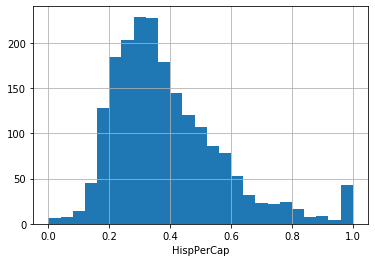

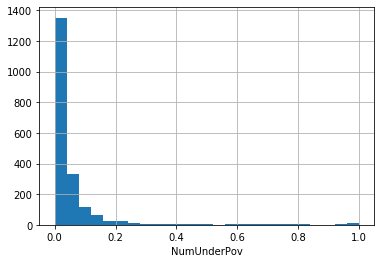

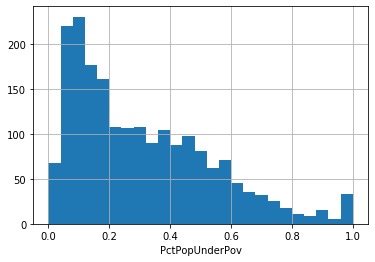

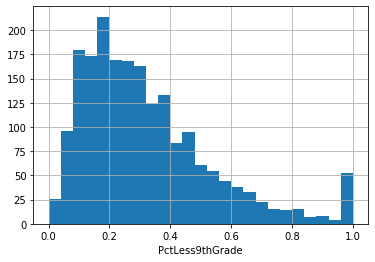

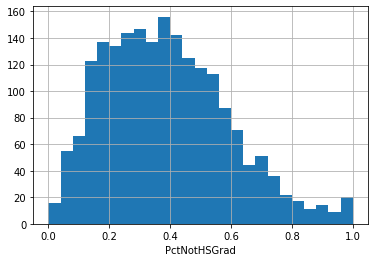

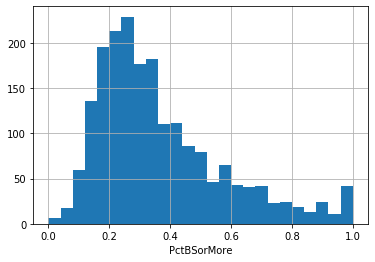

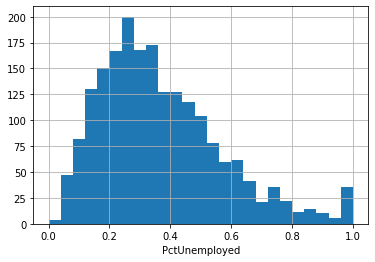

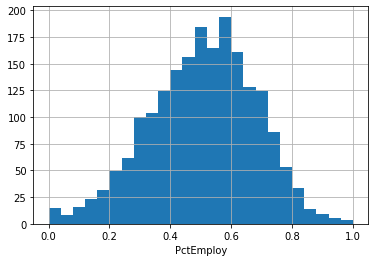

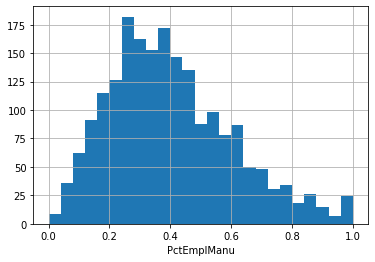

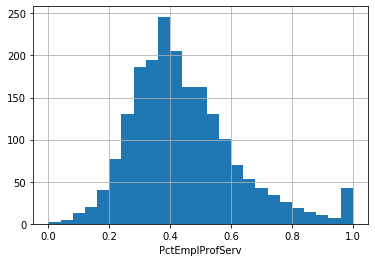

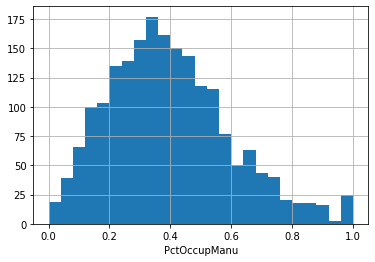

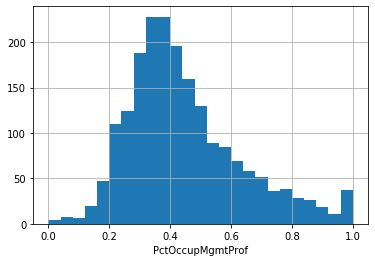

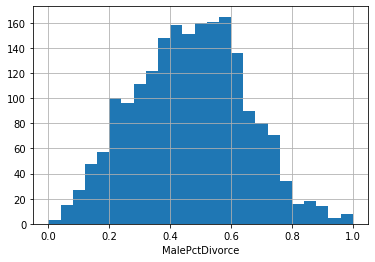

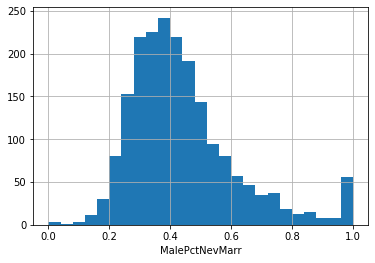

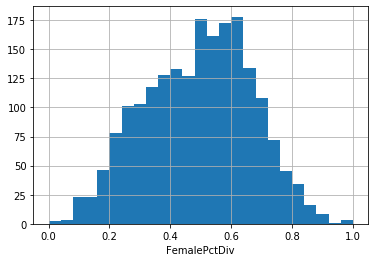

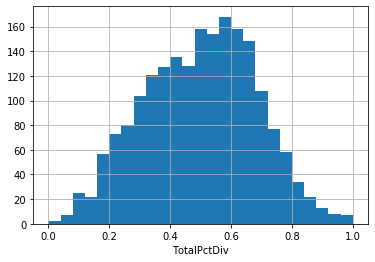

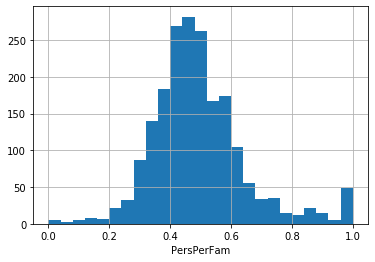

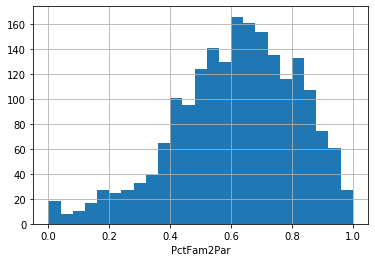

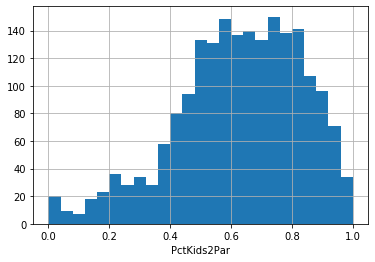

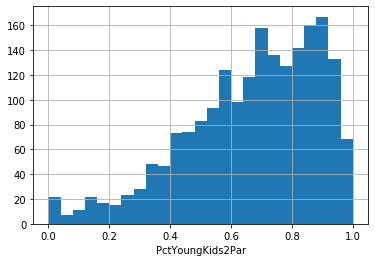

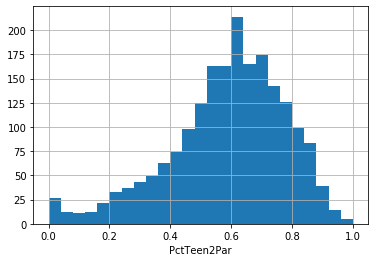

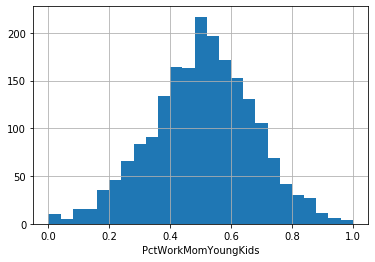

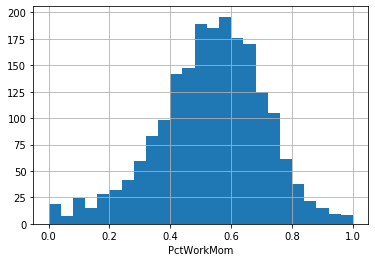

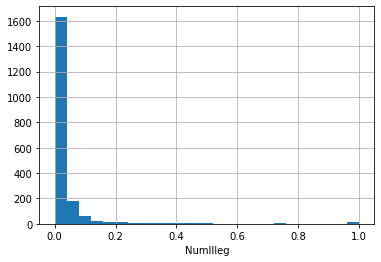

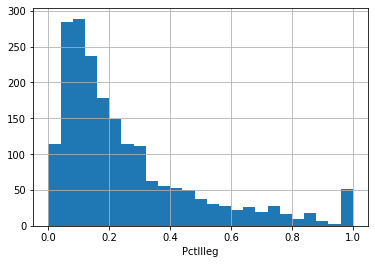

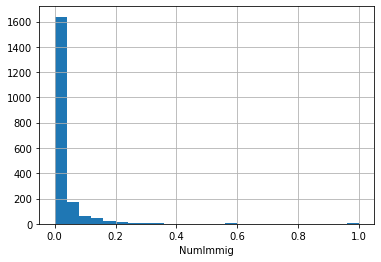

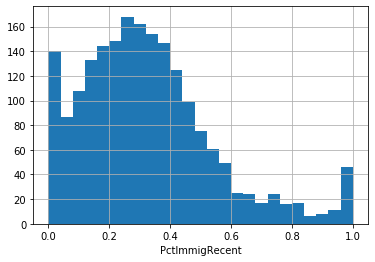

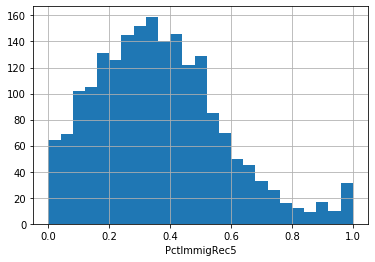

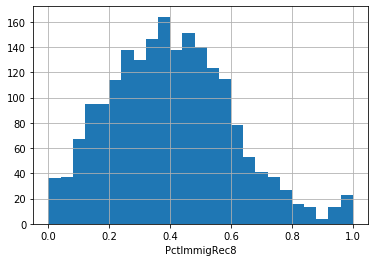

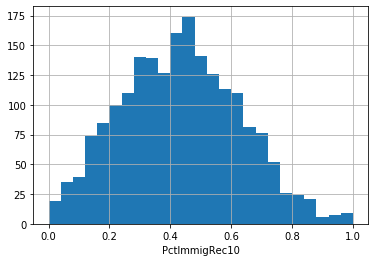

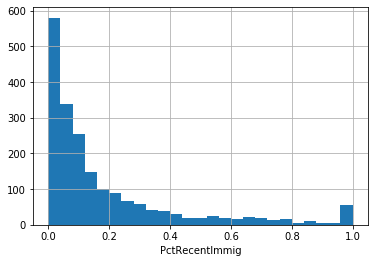

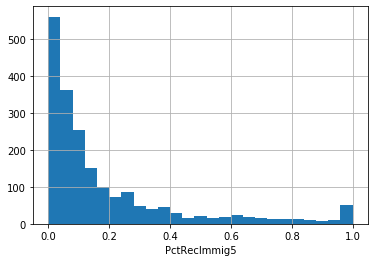

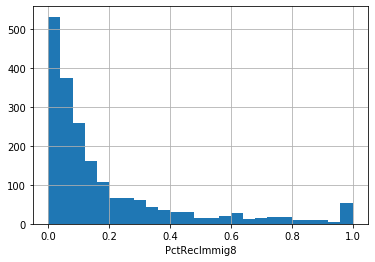

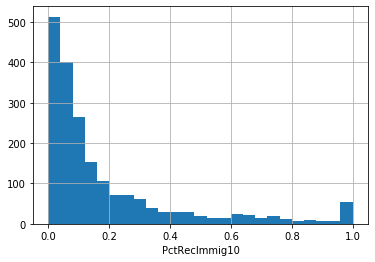

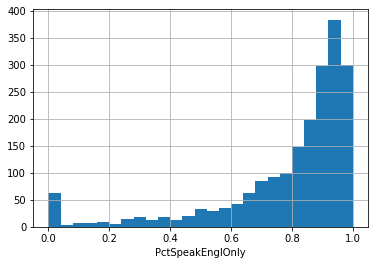

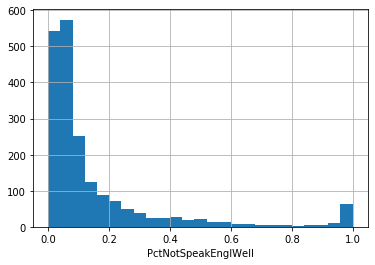

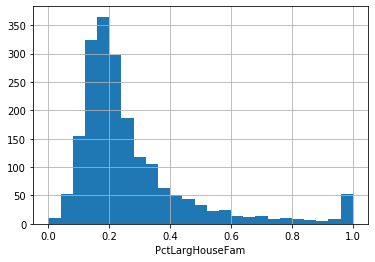

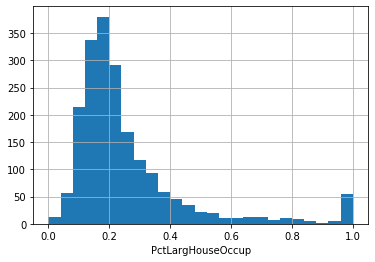

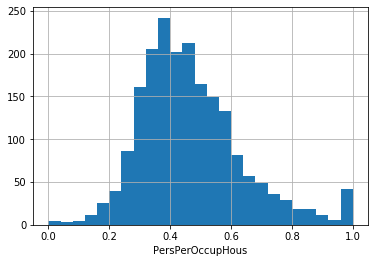

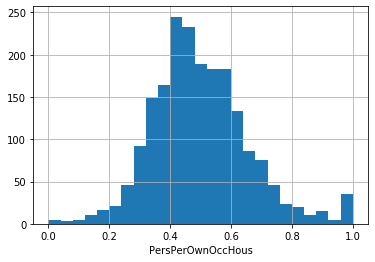

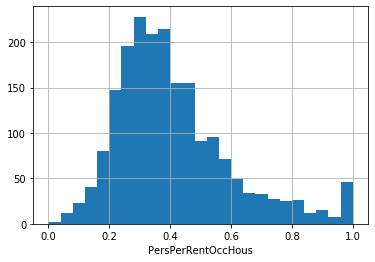

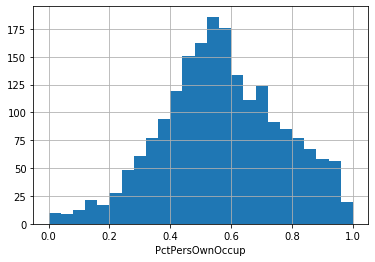

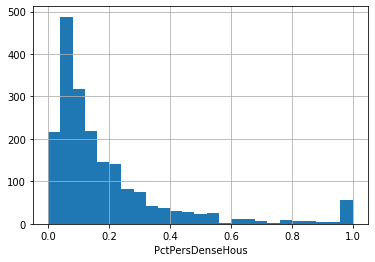

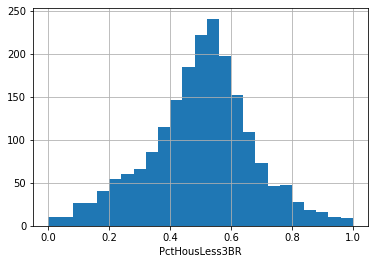

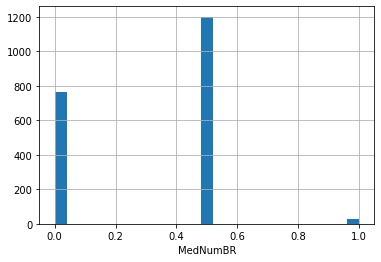

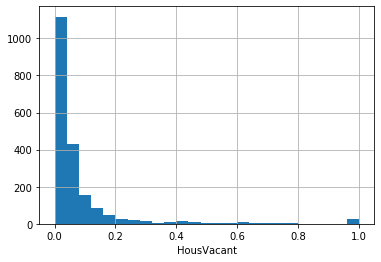

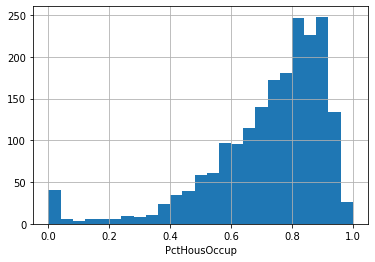

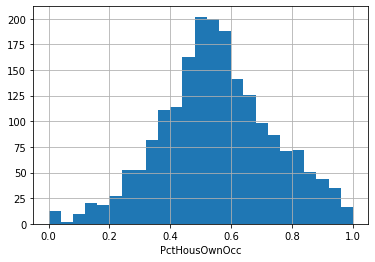

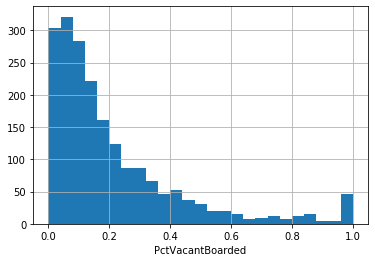

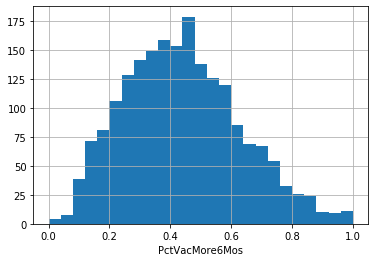

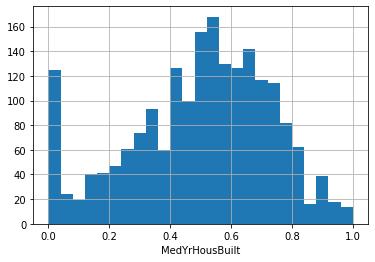

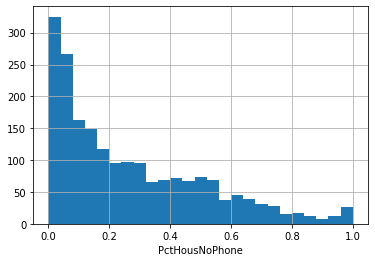

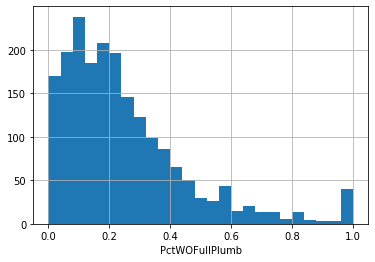

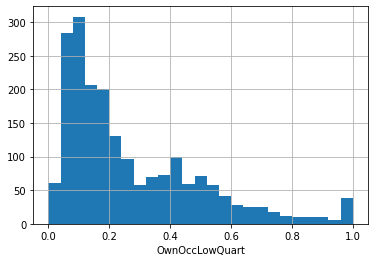

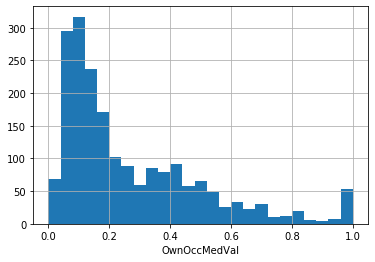

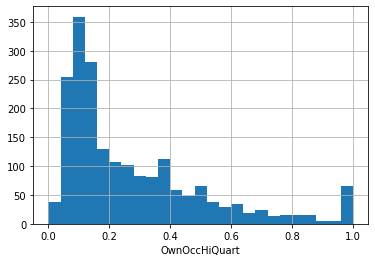

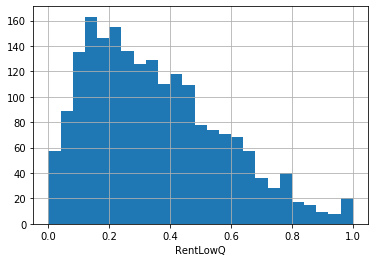

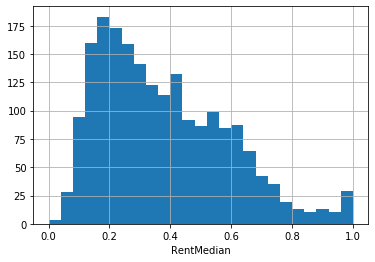

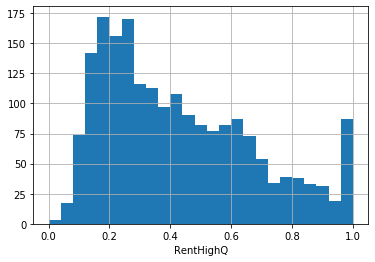

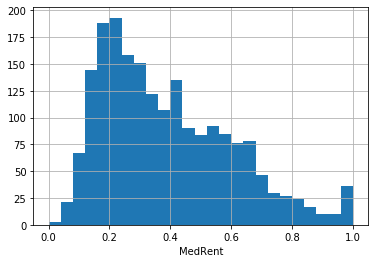

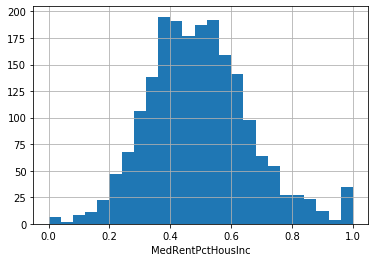

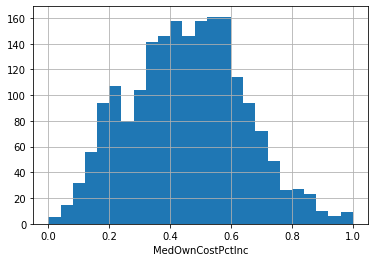

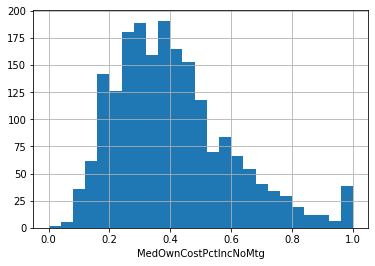

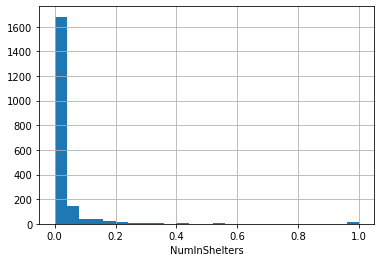

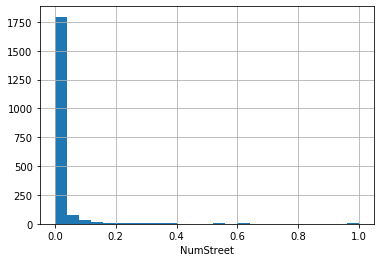

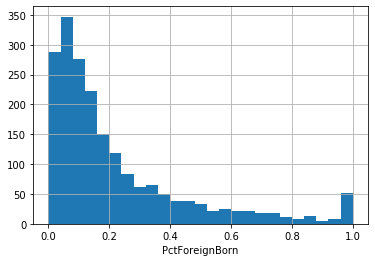

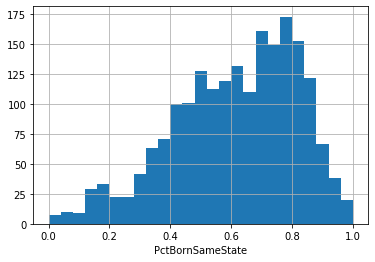

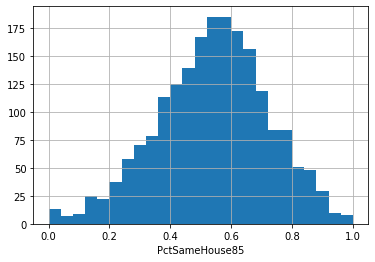

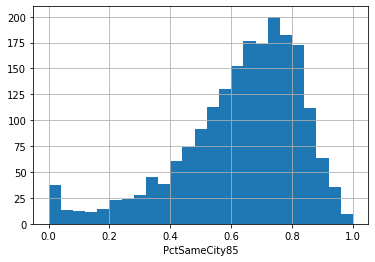

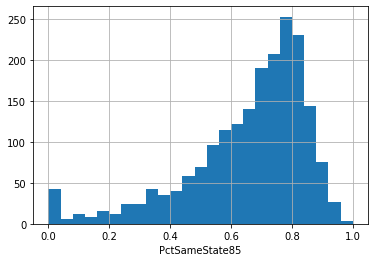

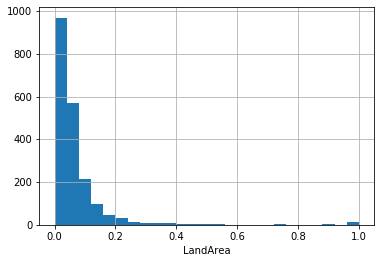

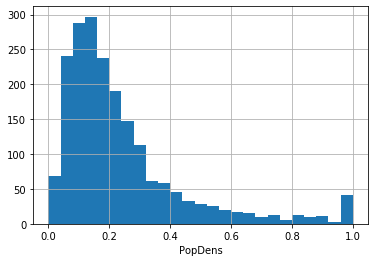

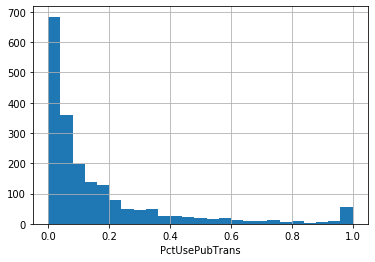

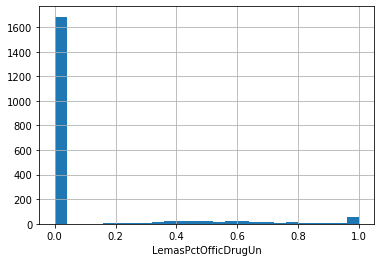

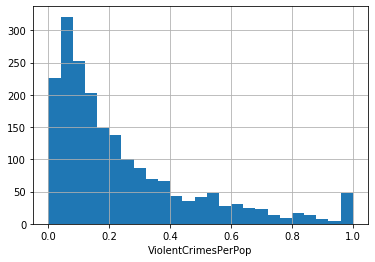

In [201]:
#checking skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

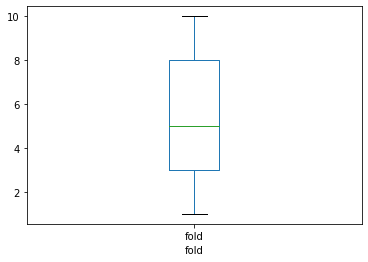

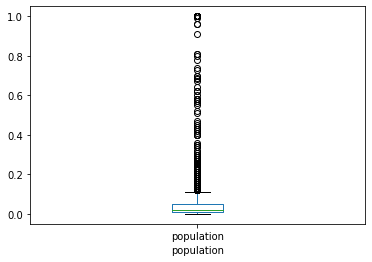

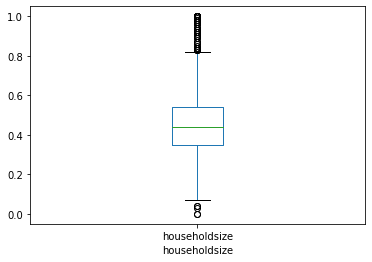

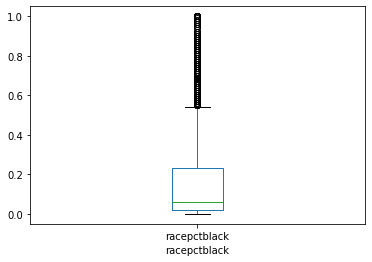

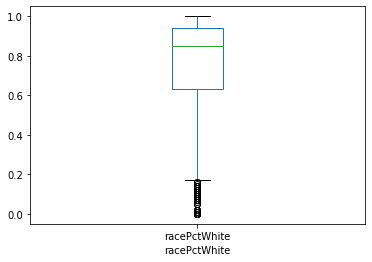

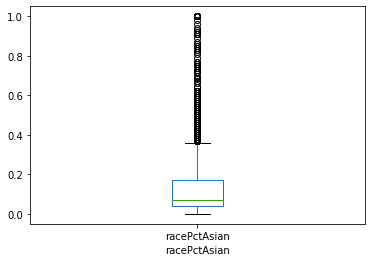

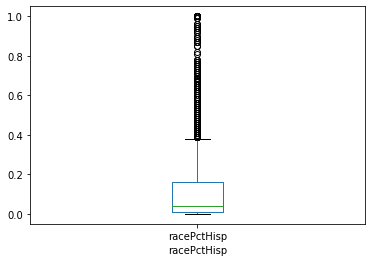

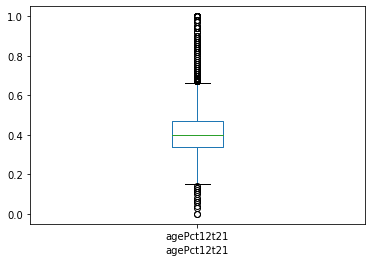

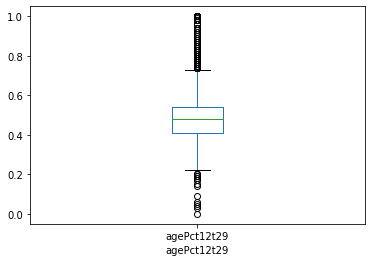

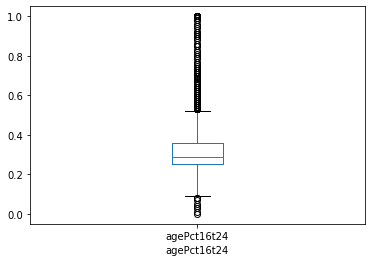

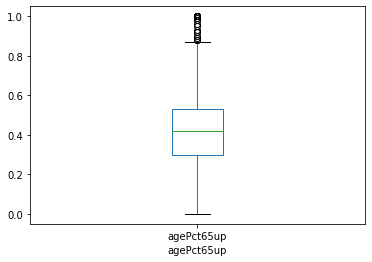

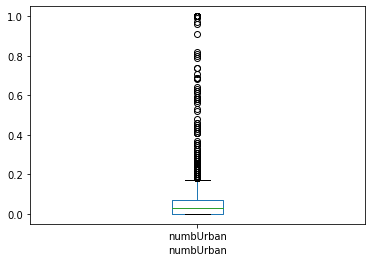

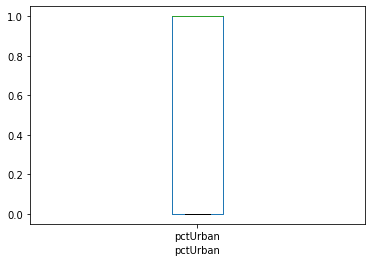

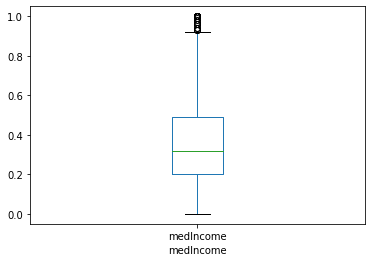

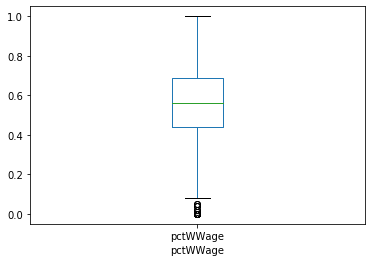

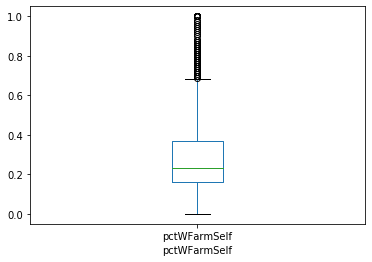

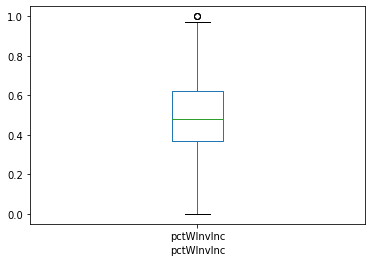

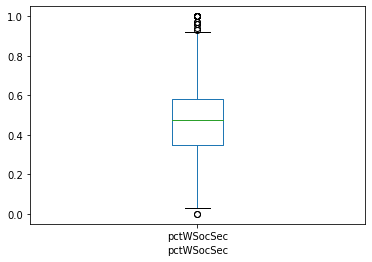

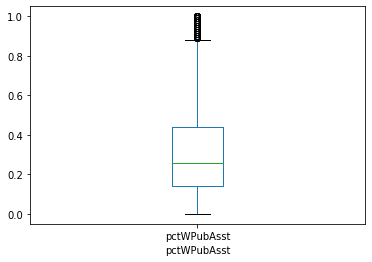

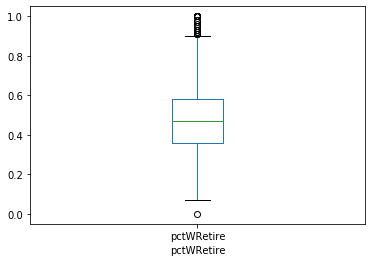

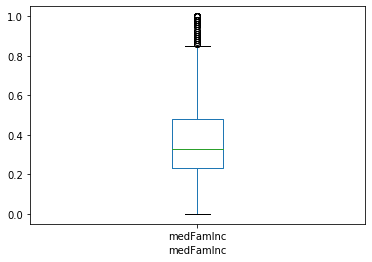

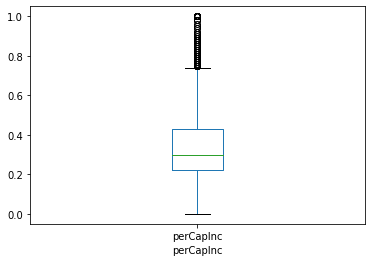

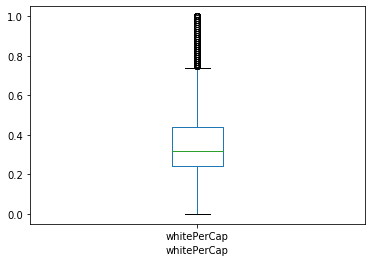

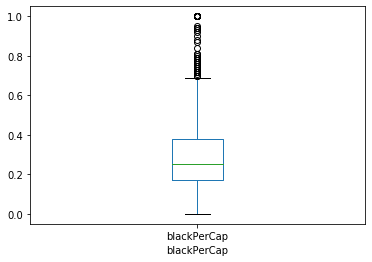

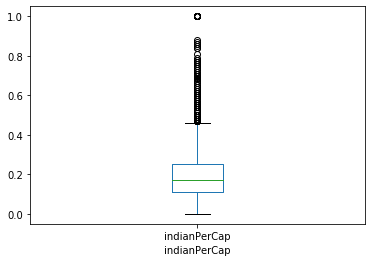

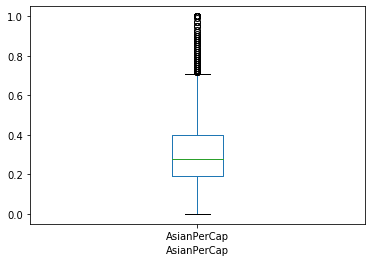

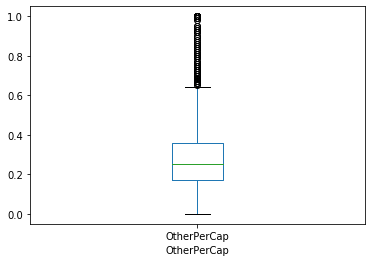

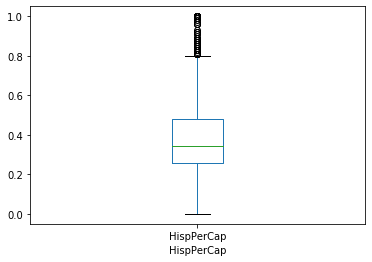

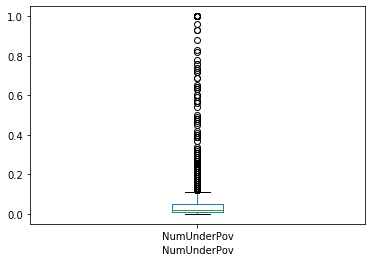

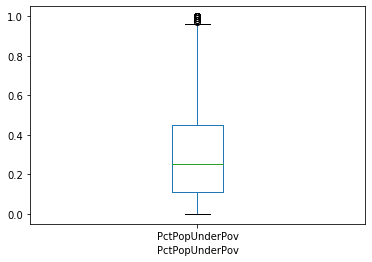

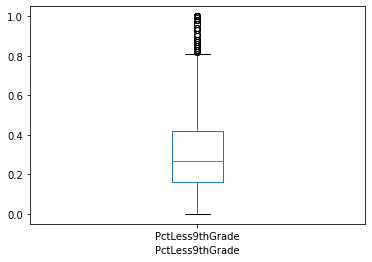

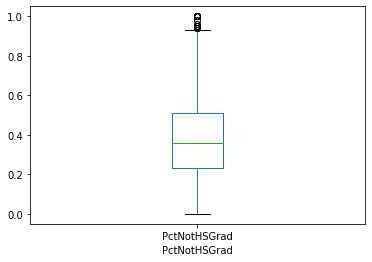

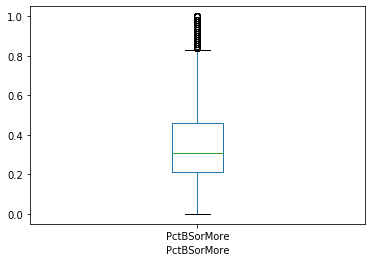

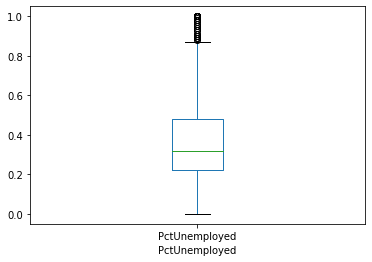

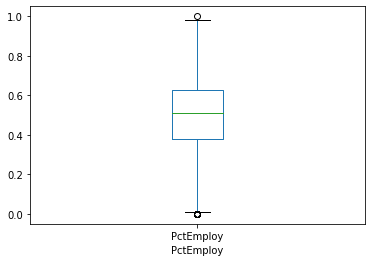

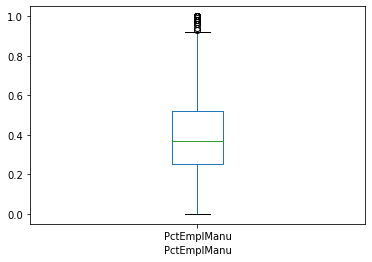

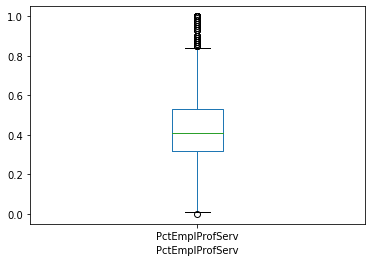

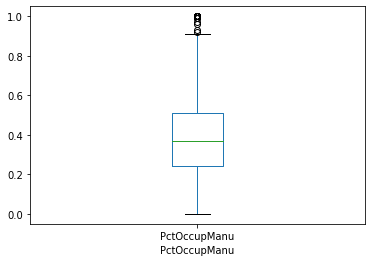

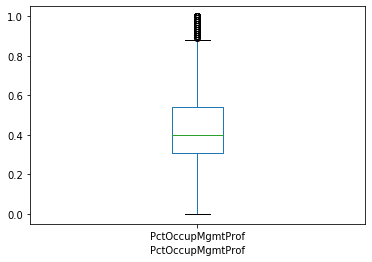

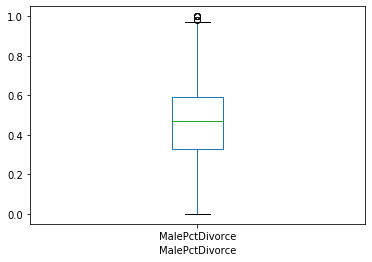

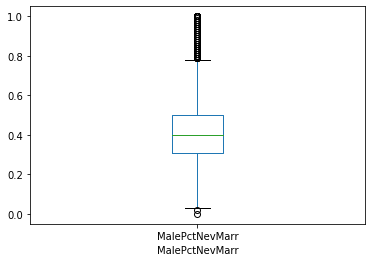

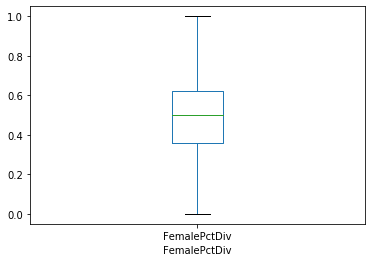

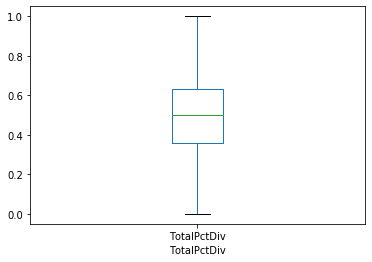

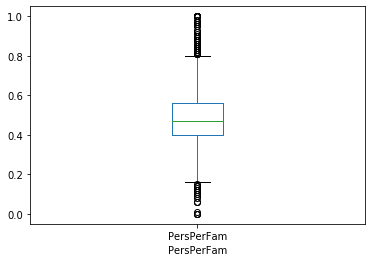

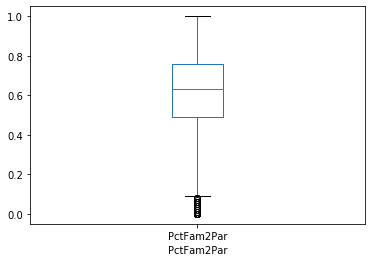

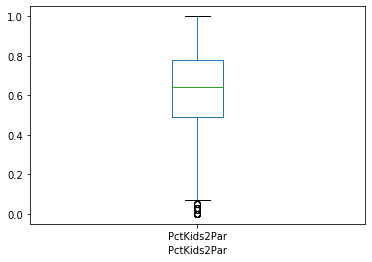

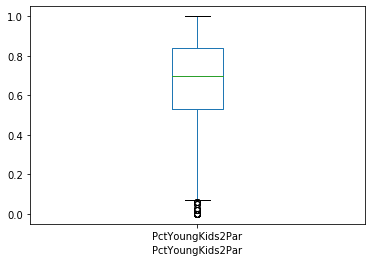

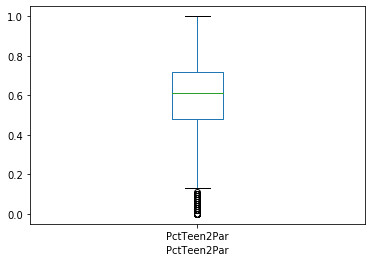

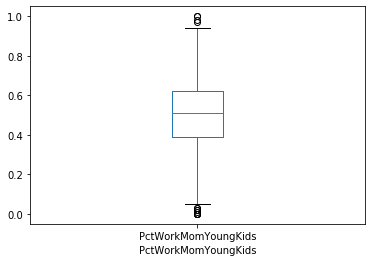

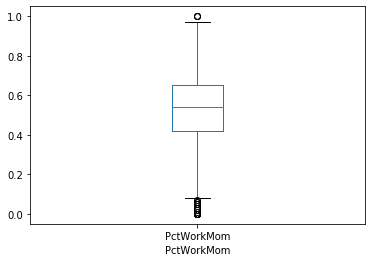

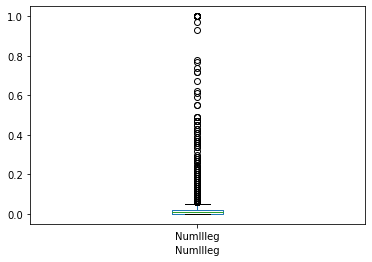

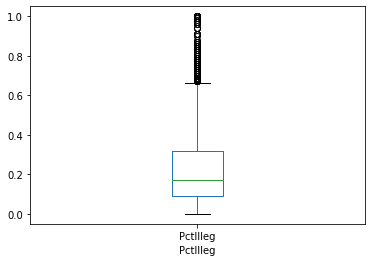

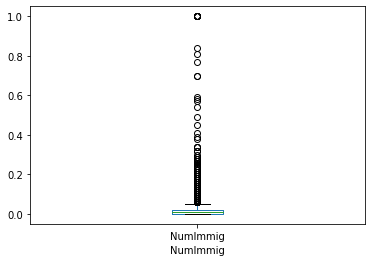

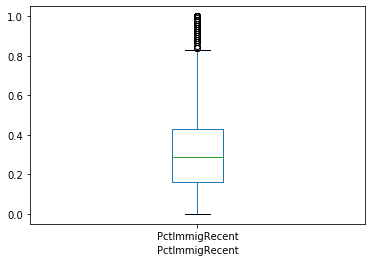

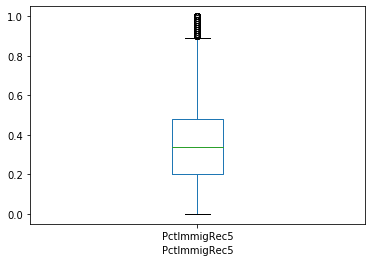

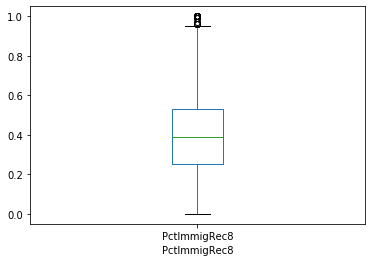

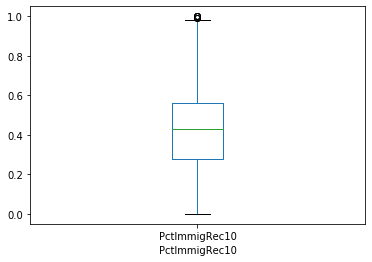

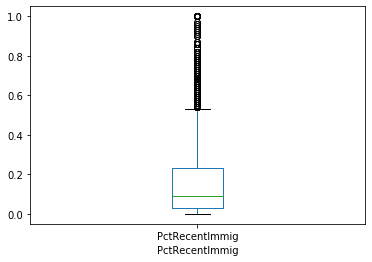

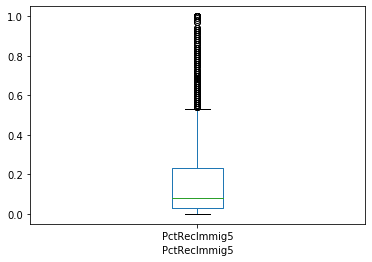

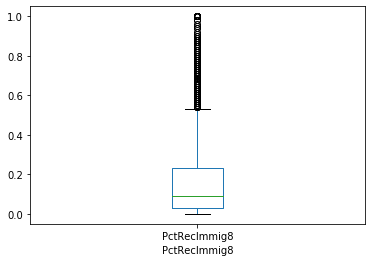

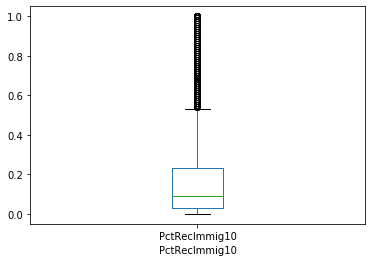

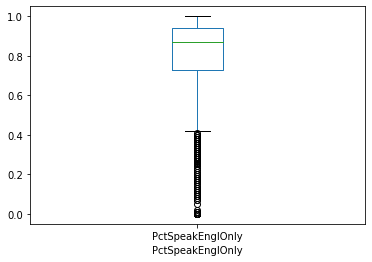

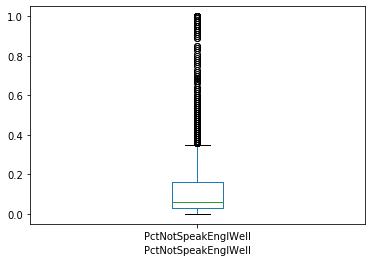

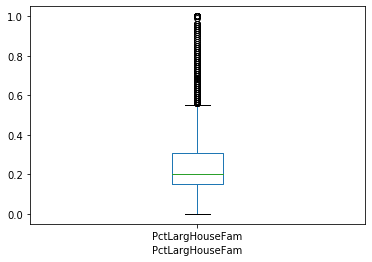

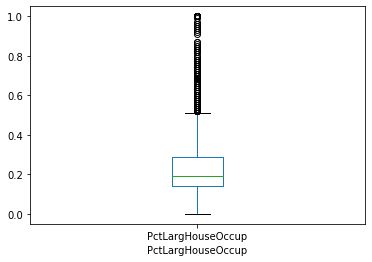

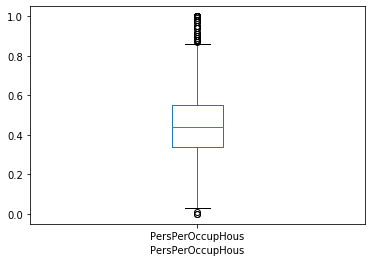

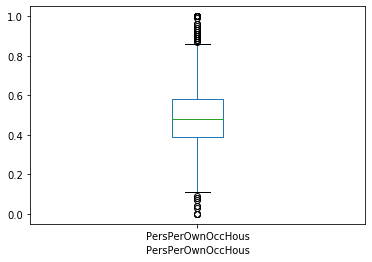

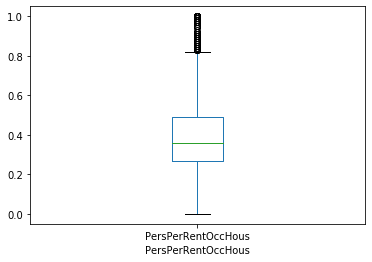

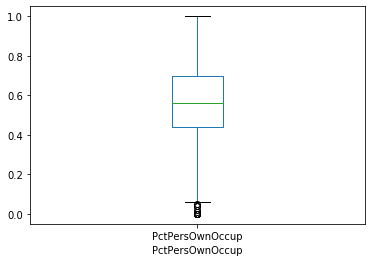

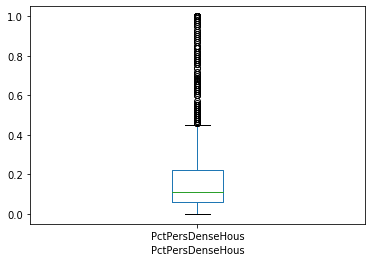

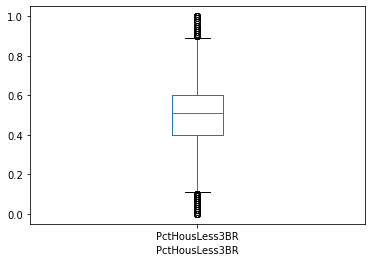

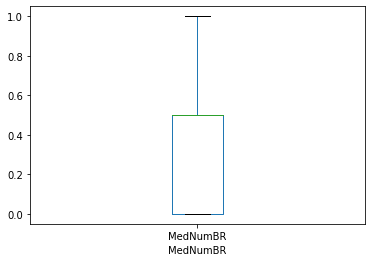

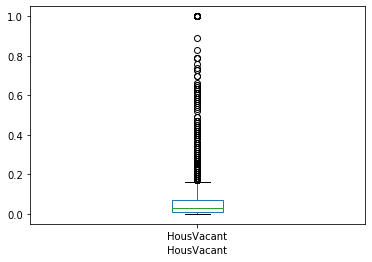

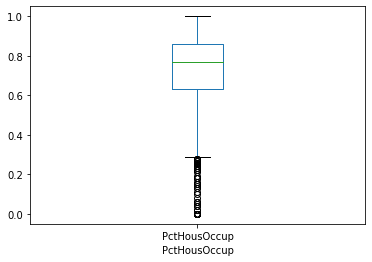

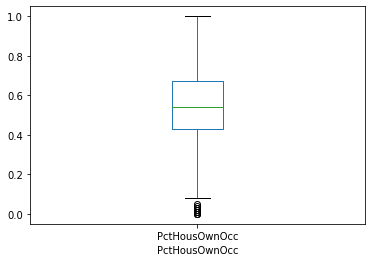

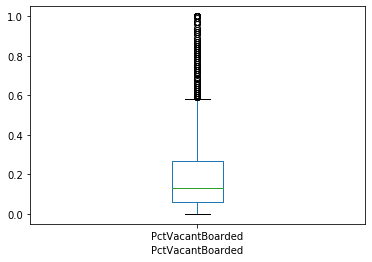

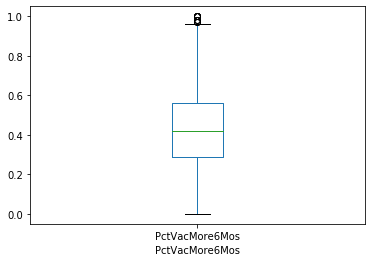

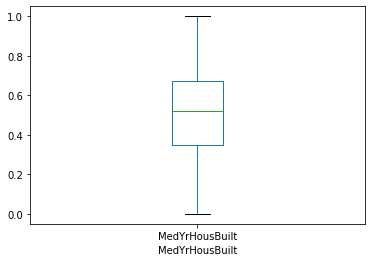

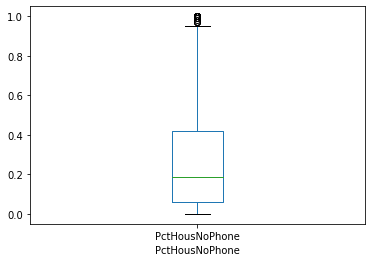

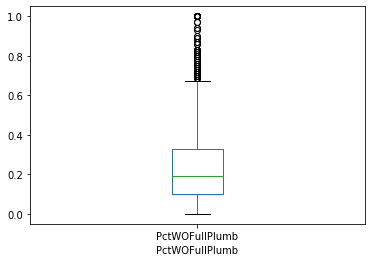

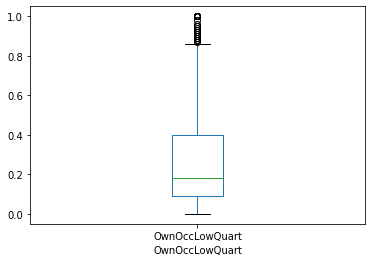

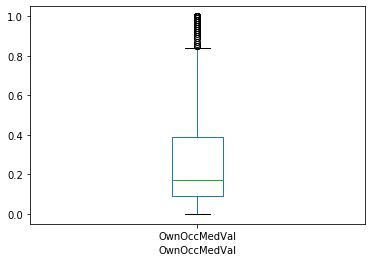

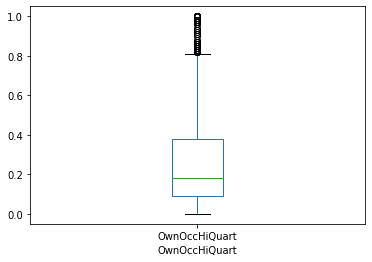

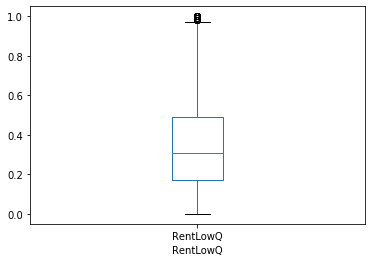

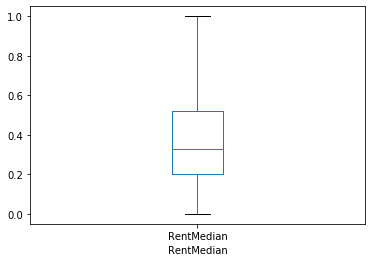

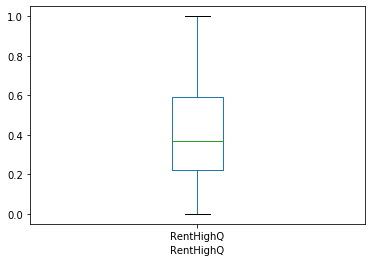

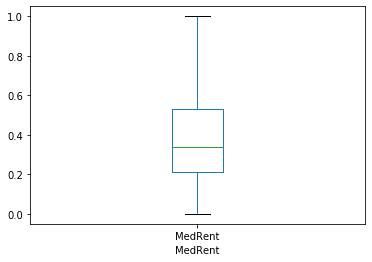

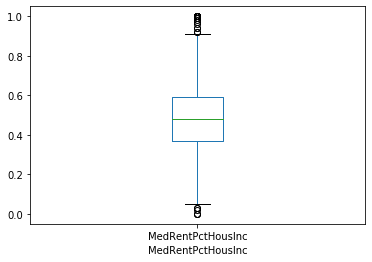

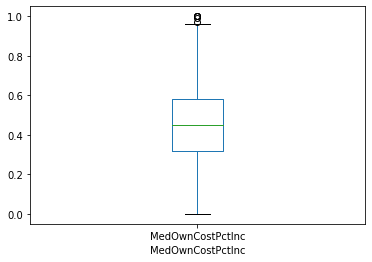

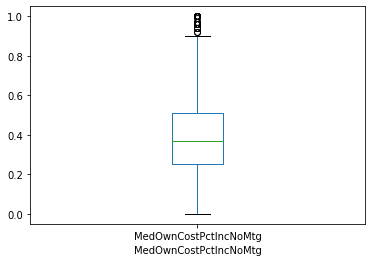

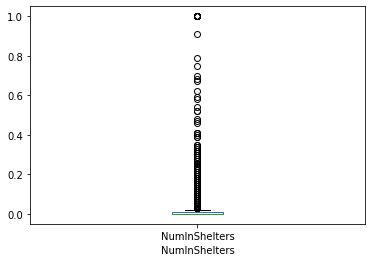

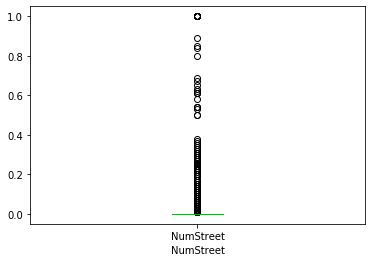

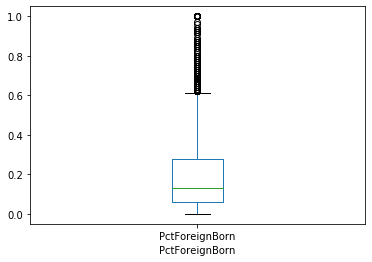

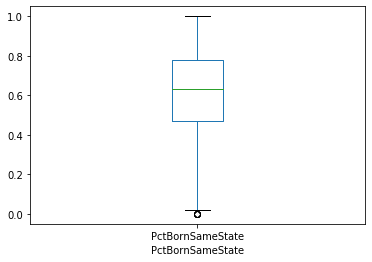

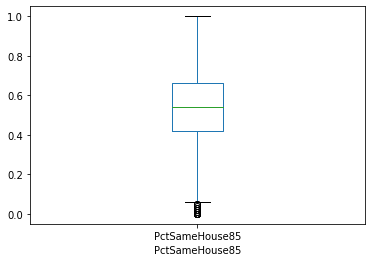

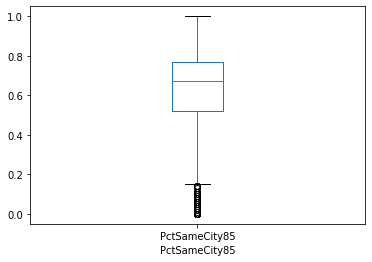

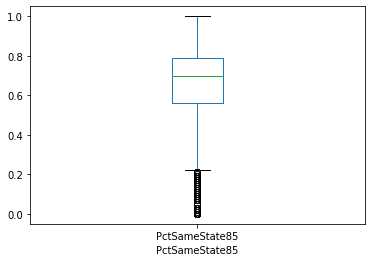

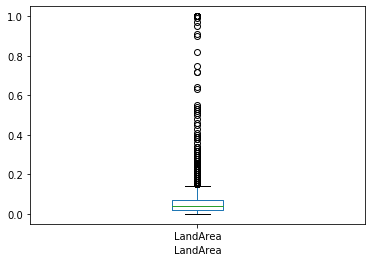

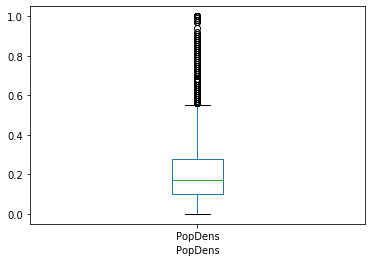

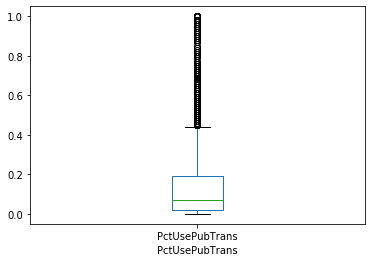

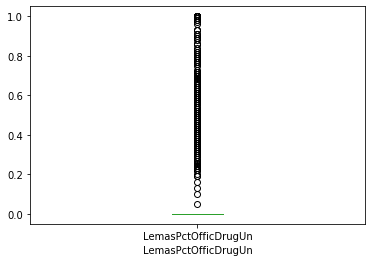

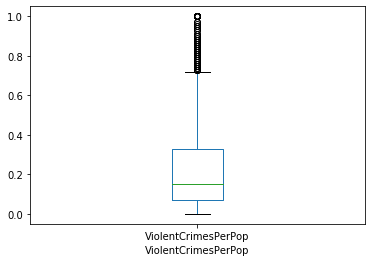

In [202]:
#checking outliers
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

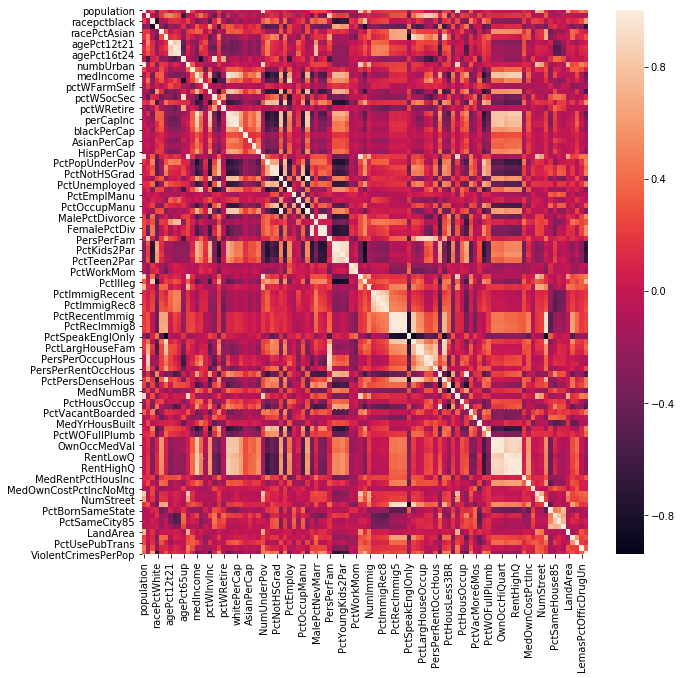

In [249]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

# Applying algorithm

In [203]:
y=y
x=xpca_50

In [204]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [205]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

# 1-KNN

In [206]:
knr=KNeighborsRegressor()
maxr2_score(knr,x,y)

max_r2_score is at random_state   98   which is   0.6028495868238977


98

In [207]:
#cross validation for knn model
from sklearn.model_selection import cross_val_score
cvs_knr_mean=cross_val_score(knr,x,y,cv=10,scoring='r2').mean()
cvs_knr_std=cross_val_score(knr,x,y,cv=10,scoring='r2').std()
print(cvs_knr_mean)
cvs_knr_std

0.5566214005076006


0.04389228285679854

# 2-SVR

In [208]:
svr=SVR()
maxr2_score(svr,x,y)

max_r2_score is at random_state   98   which is   0.7056688005070166


98

In [209]:
from sklearn.model_selection import cross_val_score
cvs_svr_mean=cross_val_score(svr,x,y,cv=10,scoring='r2').mean()
cvs_svr_std=cross_val_score(svr,x,y,cv=10,scoring='r2').std()
print(cvs_svr_mean)
cvs_svr_std

0.6492283342507176


0.05244917951787762

# 3-LinearRegression

In [210]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max_r2_score is at random_state   98   which is   0.6990574421217943


98

In [211]:
#no gridsearchcv.direct cross vallidation

In [212]:
#cross validation for Linear regression model
from sklearn.model_selection import cross_val_score
cvs_lr_mean=cross_val_score(lr,x,y,cv=10,scoring='r2').mean()
cvs_lr_std=cross_val_score(lr,x,y,cv=10,scoring='r2').std()
print(cvs_lr_mean)
cvs_lr_std

0.6463199493283471


0.04842184604627141

# 5-DecisionTreeRegressor

In [214]:
dtr=DecisionTreeRegressor()
maxr2_score(dtr,x,y)

max_r2_score is at random_state   60   which is   0.31945196864823067


60

In [215]:
from sklearn.model_selection import cross_val_score
cvs_dtr_mean=cross_val_score(dtr,x,y,cv=10,scoring='r2').mean()
cvs_dtr_std=cross_val_score(dtr,x,y,cv=10,scoring='r2').std()
print(cvs_dtr_mean)
cvs_dtr_std

0.18100061315655172


0.15896491196041468

# 6-Gradient boosting technique(GBM)

In [216]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
maxr2_score(gbr,x,y)

max_r2_score is at random_state   46   which is   0.6685325369374104


46

In [217]:
from sklearn.model_selection import cross_val_score
gbr=GradientBoostingRegressor()
cvs_gbr_mean=cross_val_score(gbr,x,y,cv=10,scoring='r2').mean()
cvs_gbr_std=cross_val_score(gbr,x,y,cv=10,scoring='r2').std()
print(cvs_gbr_mean)
cvs_gbr_std

0.6227778678917959


0.04629346867343544

# 7-RandomForestRegressor

In [218]:
rfr=RandomForestRegressor()
maxr2_score(rfr,x,y)

max_r2_score is at random_state   98   which is   0.6286865024444603


98

In [219]:
from sklearn.model_selection import cross_val_score
rfr=RandomForestRegressor()
cvs_rfr_mean=cross_val_score(rfr,x,y,cv=10,scoring='r2').mean()
cvs_rfr_std=cross_val_score(rfr,x,y,cv=10,scoring='r2').std()
print(cvs_rfr_mean)
cvs_rfr_std

0.5769962440205286


0.05011317407621287

# 8-Adaboost

In [220]:
adar=AdaBoostRegressor()
maxr2_score(adar,x,y)

max_r2_score is at random_state   46   which is   0.5112761378443524


46

In [221]:
adar=AdaBoostRegressor()
cvs_adar_mean=cross_val_score(adar,x,y,cv=10,scoring='r2').mean()
cvs_adar_std=cross_val_score(adar,x,y,cv=10,scoring='r2').std()
print(cvs_adar_mean)
cvs_adar_std

0.41732669635895714


0.0715872518197899

# 9-XGBRegressor

In [222]:
xgbr=XGBRegressor()
maxr2_score(xgbr,x,y)

max_r2_score is at random_state   95   which is   0.6364661157451279


95

In [223]:
xgbr=XGBRegressor()
cvs_xgbr_mean=cross_val_score(xgbr,x,y,cv=10,scoring='r2').mean()
cvs_xgbr_std=cross_val_score(xgbr,x,y,cv=10,scoring='r2').std()
print(cvs_xgbr_mean)
cvs_xgbr_std

0.5897457033837715


0.04778139292081803

# GridSearchCV for SVR

In [226]:
#From all the model tried above SVR performance is best 
#corresponding random_state=98
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'kernel':['linear','rbf','poly'],'C':[1,5,10,50,100],'gamma':[0.1,0.01,0.001,0.0001]}
gsvr=GridSearchCV(svr,parameters,cv=10,n_jobs=-1)
gsvr.fit(x,y)
gsvr.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

# Saving model

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98)
svr=SVR(gamma=0.01,C=10,kernel='rbf')
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score=  ',r2_score(y_test,pred))

RMSE score=  0.12904982715759816
r2_score=   0.7031923016714503


In [230]:
from sklearn.externals import joblib
joblib.dump(svr,'practiceproject_20.csv')

['practiceproject_20.csv']

In [231]:
model=joblib.load('practiceproject_20.csv')

In [232]:
model.predict(x_test)

array([ 2.31620086e-01,  9.73276037e-02,  4.95444223e-01,  1.94827997e-01,
        3.34192029e-01,  5.38236769e-01,  2.29662970e-01,  2.98884090e-01,
        3.61149713e-01,  3.32571553e-01,  9.82462071e-01,  5.26676728e-01,
        5.14731095e-01,  1.40875513e-01,  6.38142255e-01,  3.56715521e-01,
       -6.90036616e-03,  3.89634138e-01,  2.80098838e-01,  1.65935203e-01,
        2.36647505e-01,  5.48530190e-02,  6.40869640e-01,  8.89205176e-02,
        8.34260358e-02,  1.12319913e-01,  1.21874485e-01,  7.54850095e-01,
        1.90048198e-01,  1.28763461e-01,  4.07221769e-01,  4.32318952e-01,
        1.61306157e-01,  2.78224867e-01,  9.42025937e-02,  1.23600233e-01,
        2.61977814e-01,  4.71112059e-01,  2.35846280e-01,  1.39773836e-01,
        1.54223750e-01,  1.59680502e-01,  2.46136459e-01,  1.53873418e-01,
        1.18515040e-01,  8.97656496e-02,  1.44760789e-01, -7.63117306e-03,
        9.65094758e-01,  4.86810911e-01,  2.60379628e-01,  5.55156153e-01,
        1.56184686e-01,  

In [ ]:
Conclusion:-
ViolentCrimesPerPop can be predicted using the model above. 
By using sklearn(SVR)we have build a machine learning model that will us predict ViolentCrimesPerPop.
Higher the score,higher the crime rate.